In [28]:
import pandas as pd 
import numpy as np 
import os
from matplotlib import pyplot as plt

In [4]:
os.listdir()

['risk_factors_cervical_cancer.csv',
 'cervical_cancer_stats.ipynb',
 'README.md',
 '.gitignore',
 '.ipynb_checkpoints',
 '.git']

In [6]:
df = pd.read_csv('risk_factors_cervical_cancer.csv')

In [38]:
df.columns = df.columns.str.replace('\W+','_', regex=True).str.lower().str.strip('_')

In [39]:
df.columns

Index(['age', 'number_of_sexual_partners', 'first_sexual_intercourse',
       'num_of_pregnancies', 'smokes', 'smokes_years', 'smokes_packs_year',
       'hormonal_contraceptives', 'hormonal_contraceptives_years', 'iud',
       'iud_years', 'stds', 'stds_number', 'stds_condylomatosis',
       'stds_cervical_condylomatosis', 'stds_vaginal_condylomatosis',
       'stds_vulvo_perineal_condylomatosis', 'stds_syphilis',
       'stds_pelvic_inflammatory_disease', 'stds_genital_herpes',
       'stds_molluscum_contagiosum', 'stds_aids', 'stds_hiv',
       'stds_hepatitis_b', 'stds_hpv', 'stds_number_of_diagnosis',
       'stds_time_since_first_diagnosis', 'stds_time_since_last_diagnosis',
       'dx_cancer', 'dx_cin', 'dx_hpv', 'dx', 'hinselmann', 'schiller',
       'citology', 'biopsy'],
      dtype='object')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
age                                   858 non-null int64
number_of_sexual_partners             858 non-null object
first_sexual_intercourse              858 non-null object
num_of_pregnancies                    858 non-null object
smokes                                858 non-null object
smokes_years                          858 non-null object
smokes_packs_year                     858 non-null object
hormonal_contraceptives               858 non-null object
hormonal_contraceptives_years         858 non-null object
iud                                   858 non-null object
iud_years                             858 non-null object
stds                                  858 non-null object
stds_number                           858 non-null object
stds_condylomatosis                   858 non-null object
stds_cervical_condylomatosis          858 non-null object
stds_vaginal_condylomatosi

In [46]:
df.head()

,age,number_of_sexual_partners,first_sexual_intercourse,num_of_pregnancies,smokes,smokes_years,smokes_packs_year,hormonal_contraceptives,hormonal_contraceptives_years,iud,...,stds_time_since_first_diagnosis,stds_time_since_last_diagnosis,dx_cancer,dx_cin,dx_hpv,dx,hinselmann,schiller,citology,biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [48]:
df = df.replace('?', np.nan)

In [71]:
for col in df.columns:
    df[col] = df[col].astype(float)

In [93]:
for col in df.columns:
    num_responses = len(df[col].value_counts(dropna=False))
    if num_responses <= 3:
        df[col] = df[col].astype(str).str.replace('0.0', 'No').str.replace('1.0', 'Yes')

In [101]:
df.smokes

0       No
1       No
2       No
3      Yes
4       No
      ... 
853     No
854     No
855     No
856     No
857     No
Name: smokes, Length: 858, dtype: object

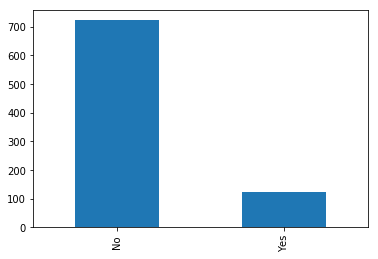

In [118]:
df.smokes [df.smokes != 'nan'].value_counts().plot.bar()

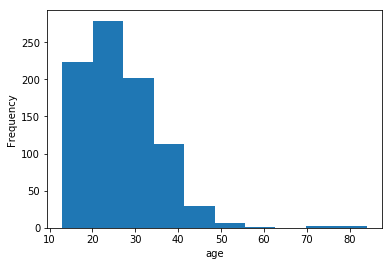

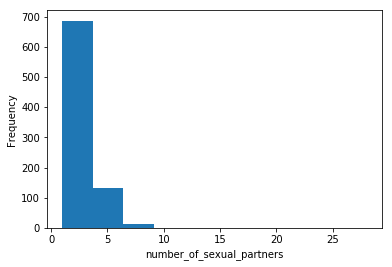

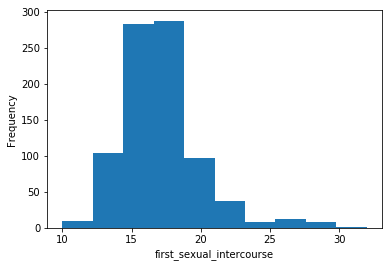

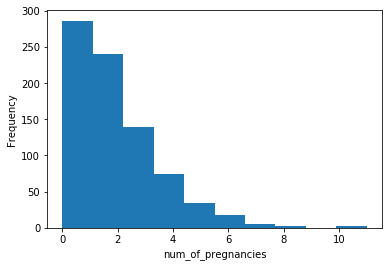

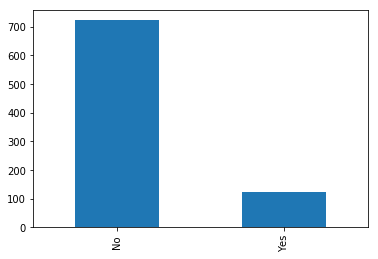

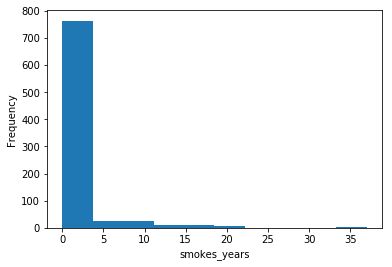

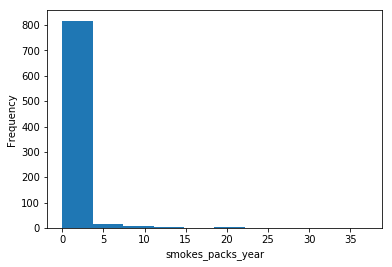

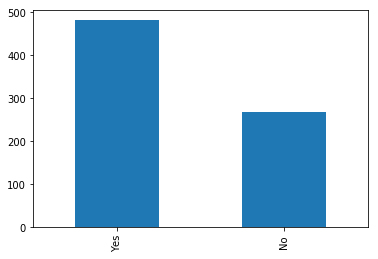

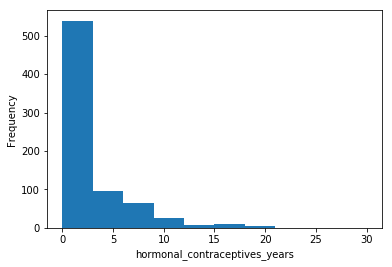

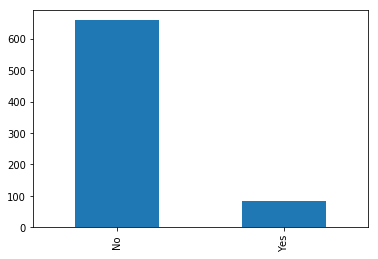

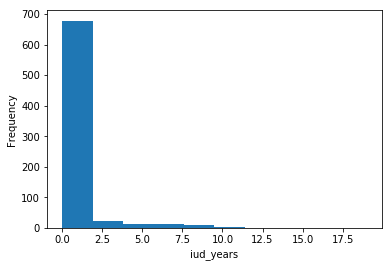

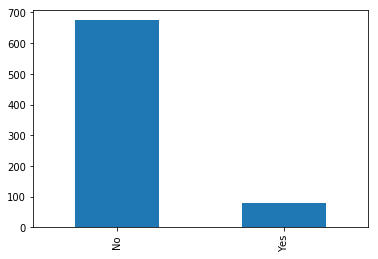

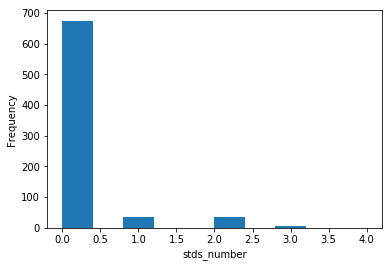

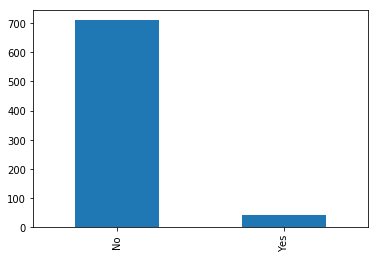

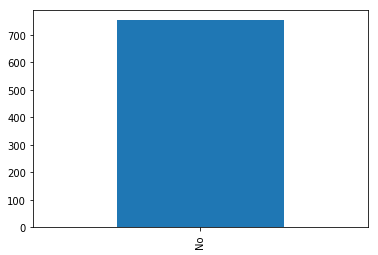

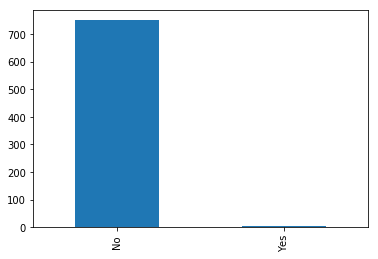

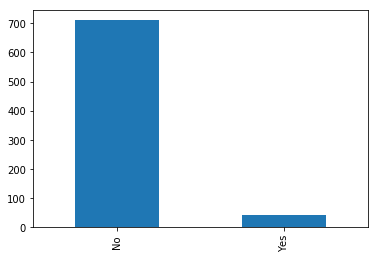

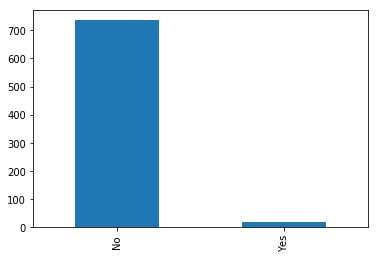

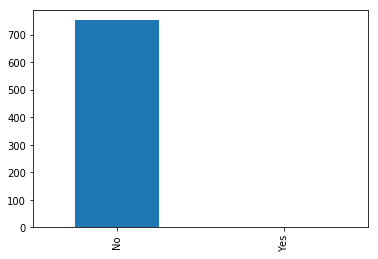

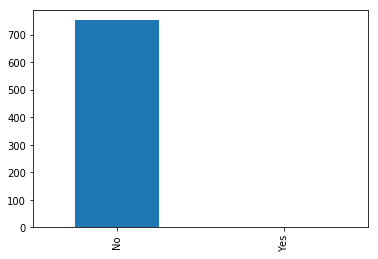

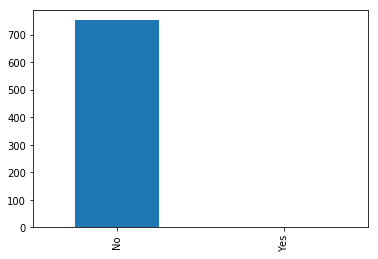

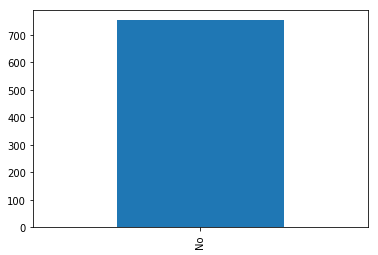

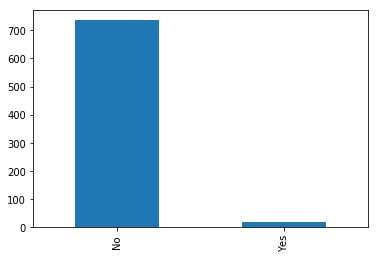

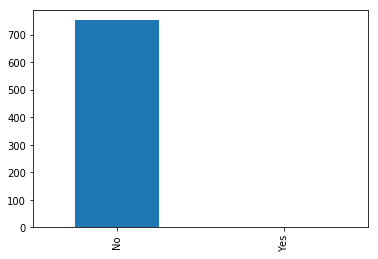

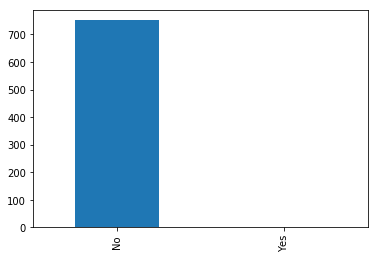

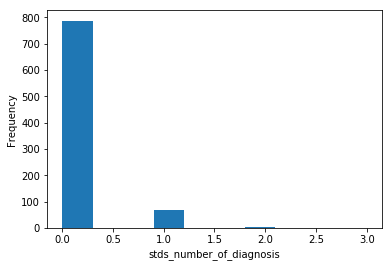

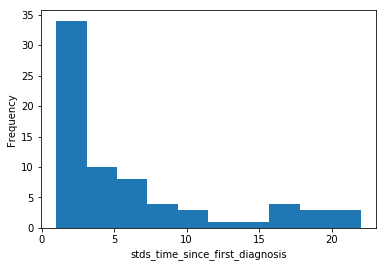

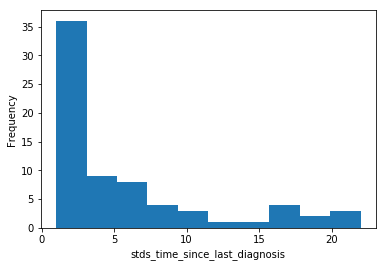

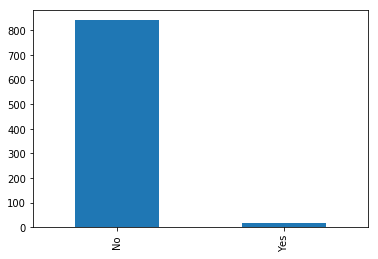

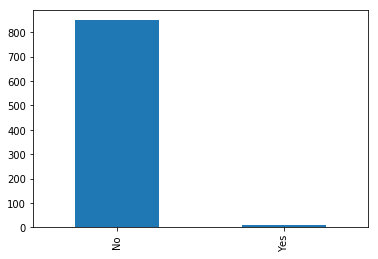

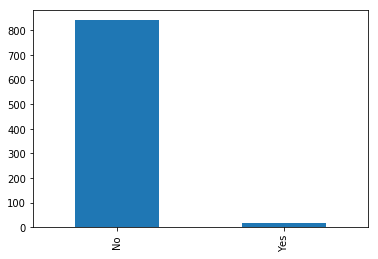

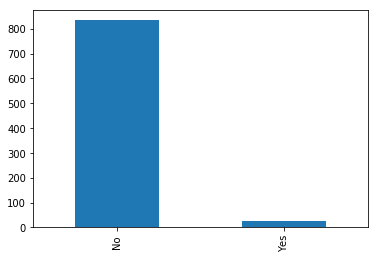

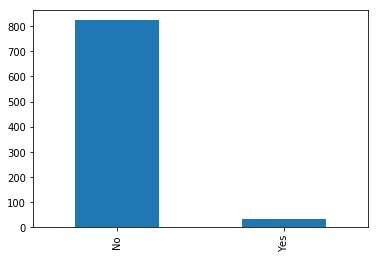

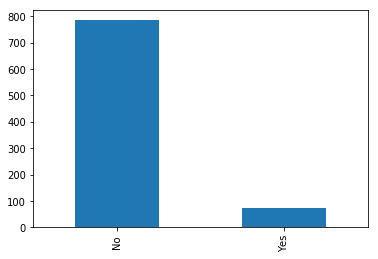

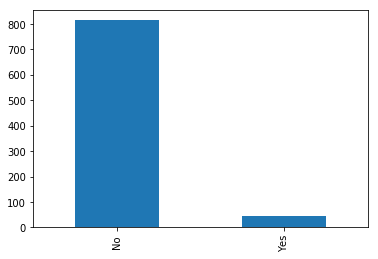

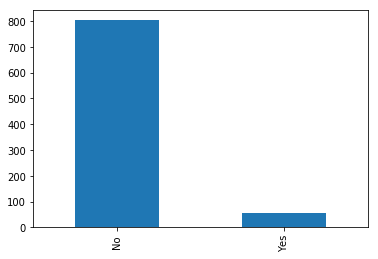

In [128]:
for col in df.columns:
    if df[col].dtype == 'float64':
        df[col].plot.hist()
        plt.xlabel(col)
        plt.show()
    else:
        df[col] [df[col] != 'nan'].value_counts().plot.bar()
        plt.show()